## 🎓 College Placement Prediction — Project Overview

## 🧩 Problem Statement
This project predicts whether a student will get placed based on their academic and profile-related data. It compares **XGBoost Classifier** (optimized with Optuna) against **Logistic Regression** to find the most accurate model for placement prediction.

---

## 🧬 Key Features Used
- **CGPA**: The most critical factor in placement.
- **Internships**: Hands-on experience impact.
- **Projects & Workshops**: Skill validation indicators.
- **Aptitude & Technical Scores**: Test performance metrics.

---

## 🛠️ Model & Optimization
- **Algorithm**: XGBoost Classifier vs. Logistic Regression.
- **Tuning**: **Optuna** (Finding the best parameters for XGBoost).
- **Evaluation Metrics**: Comparing Accuracy, Precision, Recall, and **AUC-ROC** between models.
- **Insight**: XGBoost generally outperformed Logistic Regression in capturing non-linear student profile patterns.

---

## 📚 Steps Performed
1. **Profiling**: Using `ydata-profiling` to understand student data patterns.
2. **Preprocessing**: Scaling features using `StandardScaler`.
3. **Comparison**: Building a benchmark Logistic model and an optimized XGBoost model.
4. **Final Analysis**: Displaying a comparison table of all classification metrics.

### used to optuna hyperparameter find the best parameter of the xgboost classification problem 

and build the the xgboost model

### Load the useful library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import xgboost as xgb
import optuna

### load the dataset

In [5]:
df=pd.read_csv("C:\\machile learnig implementation\\Supervised\\classification regression\\CollegePlacement.csv")

In [6]:
df

College_ID   IQ  ...  Projects_Completed  Placement
0       CLG0030  107  ...                   4         No
1       CLG0061   97  ...                   0         No
2       CLG0036  109  ...                   1         No
3       CLG0055  122  ...                   1         No
4       CLG0004   96  ...                   2         No
...         ...  ...  ...                 ...        ...
9995    CLG0021  119  ...                   0        Yes
9996    CLG0098   70  ...                   2         No
9997    CLG0066   89  ...                   5         No
9998    CLG0045  107  ...                   1         No
9999    CLG0060  109  ...                   5         No

[10000 rows x 10 columns]

### check the null values present or not in this dataset 

In [7]:
df.isnull().sum()

College_ID                0
IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64

In [8]:
df.isna().sum()

College_ID                0
IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64

In [9]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:00<00:00, 33.23it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Now divide the dataset into these parts such as label and feature columns

In [10]:
df

College_ID   IQ  ...  Projects_Completed  Placement
0       CLG0030  107  ...                   4         No
1       CLG0061   97  ...                   0         No
2       CLG0036  109  ...                   1         No
3       CLG0055  122  ...                   1         No
4       CLG0004   96  ...                   2         No
...         ...  ...  ...                 ...        ...
9995    CLG0021  119  ...                   0        Yes
9996    CLG0098   70  ...                   2         No
9997    CLG0066   89  ...                   5         No
9998    CLG0045  107  ...                   1         No
9999    CLG0060  109  ...                   5         No

[10000 rows x 10 columns]

In [41]:
# Internship_Experience ko 1 aur 0 mein badlein
df['Internship_Experience'] = df['Internship_Experience'].replace({"Yes": 1, "No": 0})

# Ensure karein ki ye integer ban gaya hai
df['Internship_Experience'] = df['Internship_Experience'].astype(int)

# Ab apna objective function dubara run karein

In [42]:
df['Internship_Experience']

0       0
1       0
2       0
3       1
4       0
       ..
9995    0
9996    0
9997    1
9998    0
9999    0
Name: Internship_Experience, Length: 10000, dtype: int32

In [43]:
df.drop(columns='College_ID',inplace=True)

KeyError: "['College_ID'] not found in axis"

In [ ]:
df

IQ  Prev_Sem_Result  ...  Projects_Completed  Placement
0     107             6.61  ...                   4         No
1      97             5.52  ...                   0         No
2     109             5.36  ...                   1         No
3     122             5.47  ...                   1         No
4      96             7.91  ...                   2         No
...   ...              ...  ...                 ...        ...
9995  119             8.41  ...                   0        Yes
9996   70             9.25  ...                   2         No
9997   89             6.08  ...                   5         No
9998  107             8.77  ...                   1         No
9999  109             9.41  ...                   5         No

[10000 rows x 9 columns]

In [44]:
x=df.drop(columns='Placement')

In [45]:
x

IQ  Prev_Sem_Result  ...  Communication_Skills  Projects_Completed
0     107             6.61  ...                     8                   4
1      97             5.52  ...                     8                   0
2     109             5.36  ...                     1                   1
3     122             5.47  ...                     6                   1
4      96             7.91  ...                    10                   2
...   ...              ...  ...                   ...                 ...
9995  119             8.41  ...                     8                   0
9996   70             9.25  ...                     7                   2
9997   89             6.08  ...                     9                   5
9998  107             8.77  ...                     5                   1
9999  109             9.41  ...                     5                   5

[10000 rows x 8 columns]

In [46]:
# 'Yes' ko 1 aur 'No' ko 0 karne ke liye
df['Placement'] = df['Placement'].replace({"Yes": 1, "No": 0})

# Check karne ke liye ki badlav hua ya nahi
print(df['Placement'].head())

0    0
1    0
2    0
3    0
4    0
Name: Placement, dtype: object


In [47]:
df['Placement']

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    0
9997    0
9998    0
9999    0
Name: Placement, Length: 10000, dtype: object

In [48]:
y=df.Placement

In [55]:
y = df['Placement'].replace({"Yes": 1, "No": 0}).astype(int)

#### divide the dataset into train,and test dataset

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.20,random_state=100)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def objective(trial): # trail ko trial kar diya (standard)
    # test_size ko 0.20 kiya (20% data)
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20, random_state=30)
    
    param = {
        "tree_method": "hist",
        "verbosity": 0, # Tuning ke waqt 0 ya 1 rakhen, 3 bahut zyada log bharta hai
        "objective": "binary:logistic", # 's' hata diya
        "booster": trial.suggest_categorical("booster", ["dart", "gbtree", "gblinear"]),
        "lambda": trial.suggest_float("lambda", 1e-4, 1, log=True),
        "alpha": trial.suggest_float("alpha", 1e-4, 1),
    }

    # this paramater run only gbtree and dart
    if param["booster"] in ["gbtree", "dart"]:
        param["subsample"] = trial.suggest_float("subsample", 0.1, 0.9)
        param["colsample_bytree"] = trial.suggest_float("colsample_bytree", 0.1, 0.9)
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["learning_rate"] = trial.suggest_float("learning_rate", 0.01, 0.3)

    xgb_classifier = xgb.XGBClassifier(**param)
    
    # Training
    xgb_classifier.fit(train_x, train_y, eval_set=[(test_x, test_y)], verbose=False)
    
    pred_y = xgb_classifier.predict(test_x)
    accuracy = accuracy_score(test_y, pred_y)
    
    return accuracy

In [58]:
xgb_classfication_optuna=optuna.create_study(direction='minimize')
xgb_classfication_optuna.optimize(objective,n_trials=20)
xgb_classfication_optuna.best_trial.params

[I 2025-12-16 19:18:55,580] A new study created in memory with name: no-name-102e0a56-b85d-41d2-9e03-c4d94b4fe3c6
[I 2025-12-16 19:18:55,737] Trial 0 finished with value: 0.8425 and parameters: {'booster': 'gblinear', 'lambda': 0.021259671243173656, 'alpha': 0.5063258237826964}. Best is trial 0 with value: 0.8425.
[I 2025-12-16 19:18:55,820] Trial 1 finished with value: 0.998 and parameters: {'booster': 'gbtree', 'lambda': 0.02132181359768864, 'alpha': 0.35725774496835244, 'subsample': 0.17078120347637488, 'colsample_bytree': 0.2543209141625884, 'gamma': 2.615667390170808e-06, 'learning_rate': 0.14619732517617456}. Best is trial 0 with value: 0.8425.
[I 2025-12-16 19:18:55,874] Trial 2 finished with value: 0.8425 and parameters: {'booster': 'gblinear', 'lambda': 0.012896078914895737, 'alpha': 0.33935388914766146}. Best is trial 0 with value: 0.8425.
[I 2025-12-16 19:18:56,870] Trial 3 finished with value: 0.999 and parameters: {'booster': 'dart', 'lambda': 0.008130244628269025, 'alpha'

{'booster': 'gblinear',
 'lambda': 0.021259671243173656,
 'alpha': 0.5063258237826964}

In [40]:
df

IQ  Prev_Sem_Result  ...  Projects_Completed  Placement
0     107             6.61  ...                   4          0
1      97             5.52  ...                   0          0
2     109             5.36  ...                   1          0
3     122             5.47  ...                   1          0
4      96             7.91  ...                   2          0
...   ...              ...  ...                 ...        ...
9995  119             8.41  ...                   0          1
9996   70             9.25  ...                   2          0
9997   89             6.08  ...                   5          0
9998  107             8.77  ...                   1          0
9999  109             9.41  ...                   5          0

[10000 rows x 9 columns]

In [59]:
best_parameter=xgb_classfication_optuna.best_trial.params

In [60]:
xgb_final_model=xgb.XGBClassifier(**best_parameter)
xgb_final_model.fit(x_train,y_train)

XGBClassifier(alpha=0.5063258237826964, base_score=None, booster='gblinear',
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              lambda=0.021259671243173656, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, ...)

In [61]:
xgb_final_model.score(x_test,y_test)

0.83575

### Logistic regreesion

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
model=LogisticRegression()

In [64]:
model.fit(x_train,y_train)

c:\Users\subod\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [65]:
model.score(x_test,y_test)

0.9

In [66]:
model.score(x_train,y_train)

0.887

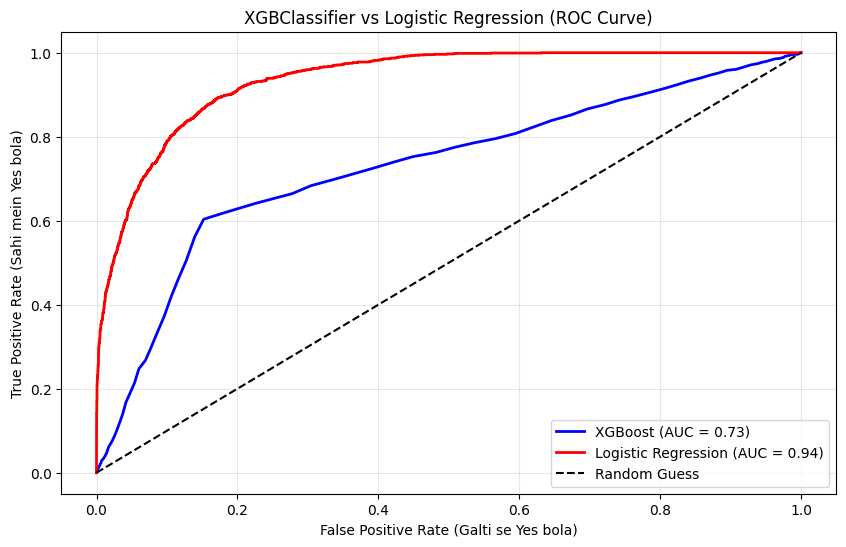

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, ConfusionMatrixDisplay

# 1. Probabilities nikalen (Plots ke liye ye zaroori hai)
y_prob_xgb = xgb_final_model.predict_proba(x_test)[:, 1]
y_prob_lr = model.predict_proba(x_test)[:, 1]

# 2. ROC Metrics calculate karein
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)

# 3. Plotting
plt.figure(figsize=(10, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_score(y_test, y_prob_xgb):.2f})', color='blue', lw=2)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_prob_lr):.2f})', color='red', lw=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess') # Diagonal line

plt.xlabel('False Positive Rate (Galti se Yes bola)')
plt.ylabel('True Positive Rate (Sahi mein Yes bola)')
plt.title('XGBClassifier vs Logistic Regression (ROC Curve)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

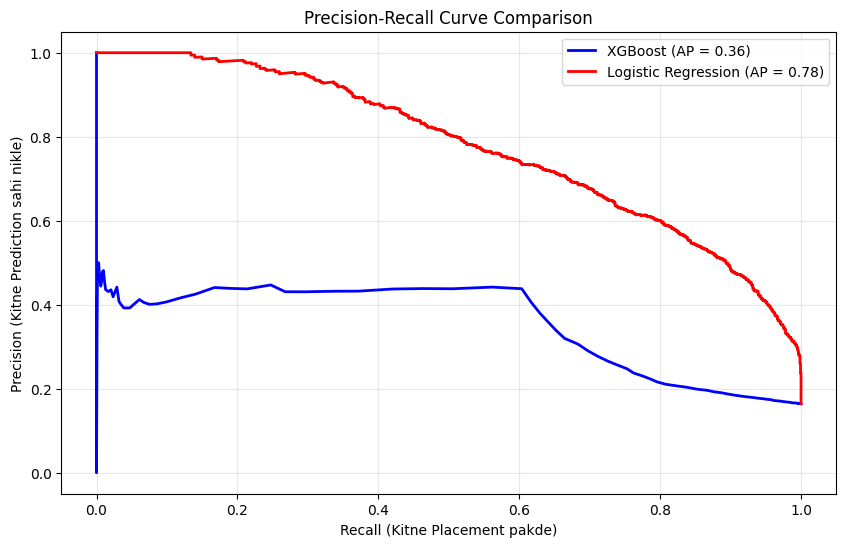

In [70]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Precision aur Recall calculate karein
prec_xgb, rec_xgb, _ = precision_recall_curve(y_test, y_prob_xgb)
prec_lr, rec_lr, _ = precision_recall_curve(y_test, y_prob_lr)

plt.figure(figsize=(10, 6))
plt.plot(rec_xgb, prec_xgb, label=f'XGBoost (AP = {average_precision_score(y_test, y_prob_xgb):.2f})', color='blue', lw=2)
plt.plot(rec_lr, prec_lr, label=f'Logistic Regression (AP = {average_precision_score(y_test, y_prob_lr):.2f})', color='red', lw=2)

plt.xlabel('Recall (Kitne Placement pakde)')
plt.ylabel('Precision (Kitne Prediction sahi nikle)')
plt.title('Precision-Recall Curve Comparison')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

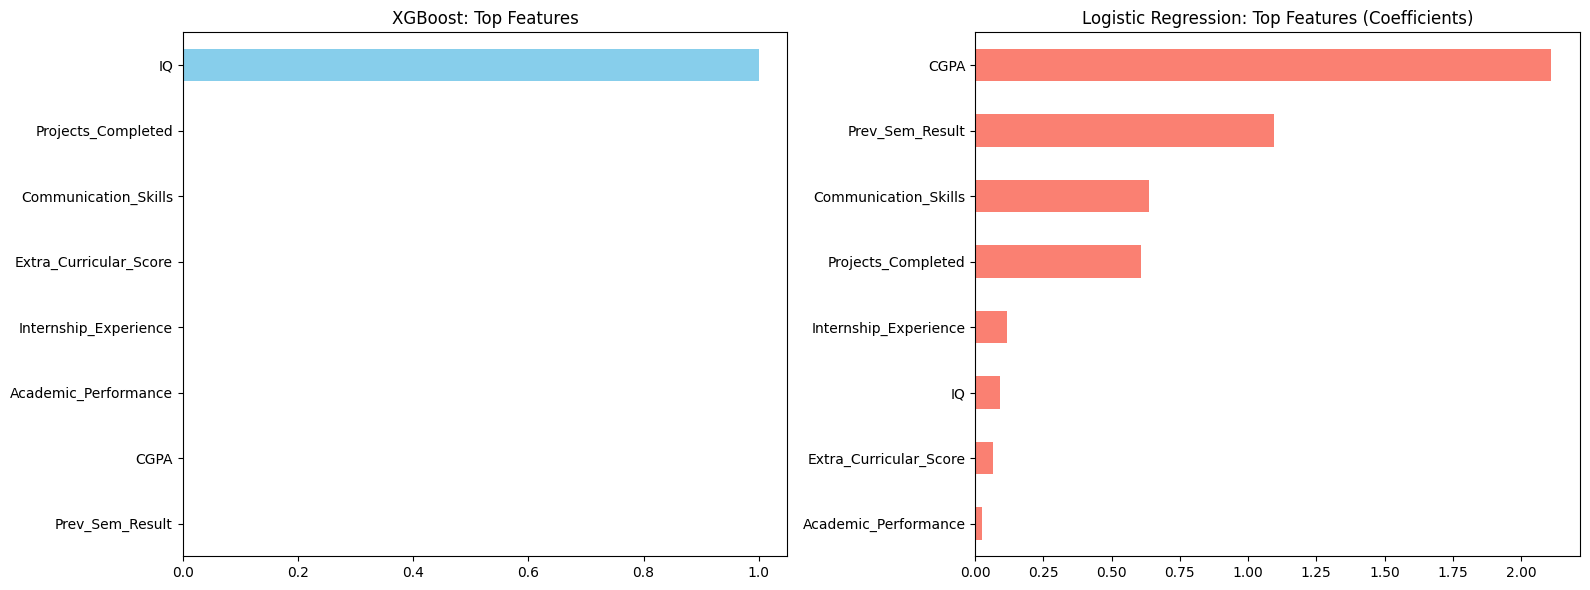

In [71]:
import pandas as pd

# Data taiyar karein (Maan lijiye x_test ke columns names hain)
features = x_test.columns

# Logistic Regression ke Coefficients
lr_importance = np.abs(model.coef_[0]) 

# XGBoost ki Feature Importance
xgb_importance = xgb_final_model.feature_importances_

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# XGBoost Plot
pd.Series(xgb_importance, index=features).sort_values().plot(kind='barh', ax=ax[0], color='skyblue')
ax[0].set_title('XGBoost: Top Features')

# Logistic Regression Plot
pd.Series(lr_importance, index=features).sort_values().plot(kind='barh', ax=ax[1], color='salmon')
ax[1].set_title('Logistic Regression: Top Features (Coefficients)')

plt.tight_layout()
plt.show()

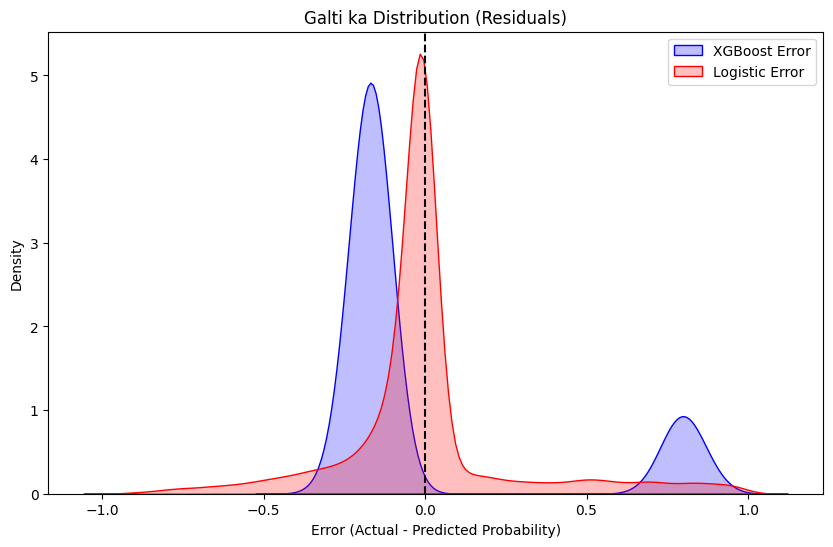

In [72]:
import seaborn as sns

plt.figure(figsize=(10, 6))
# XGBoost ke errors
sns.kdeplot(y_test - y_prob_xgb, label='XGBoost Error', fill=True, color='blue')
# Logistic ke errors
sns.kdeplot(y_test - y_prob_lr, label='Logistic Error', fill=True, color='red')

plt.axvline(0, color='black', linestyle='--')
plt.title('Galti ka Distribution (Residuals)')
plt.xlabel('Error (Actual - Predicted Probability)')
plt.legend()
plt.show()

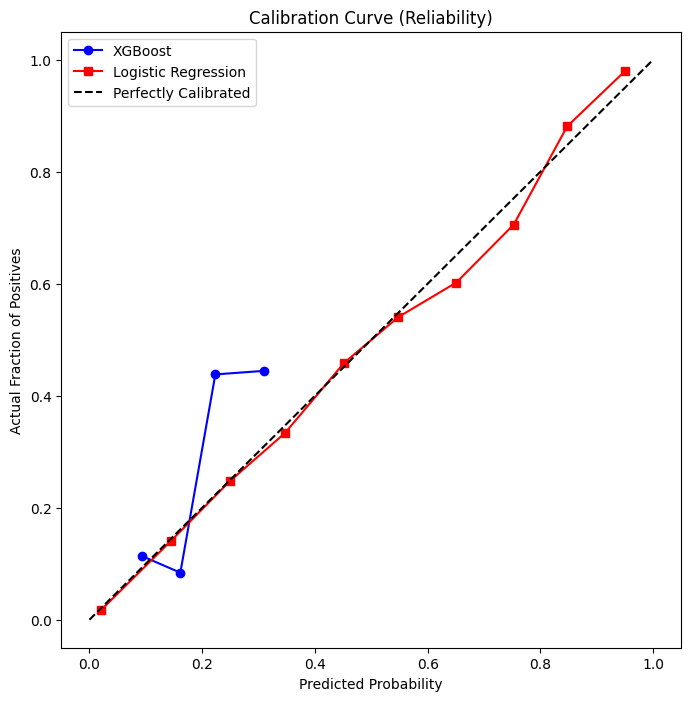

In [73]:
from sklearn.calibration import calibration_curve

prob_true_xgb, prob_pred_xgb = calibration_curve(y_test, y_prob_xgb, n_bins=10)
prob_true_lr, prob_pred_lr = calibration_curve(y_test, y_prob_lr, n_bins=10)

plt.figure(figsize=(8, 8))
plt.plot(prob_pred_xgb, prob_true_xgb, marker='o', label='XGBoost', color='blue')
plt.plot(prob_pred_lr, prob_true_lr, marker='s', label='Logistic Regression', color='red')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly Calibrated', color='black')

plt.xlabel('Predicted Probability')
plt.ylabel('Actual Fraction of Positives')
plt.title('Calibration Curve (Reliability)')
plt.legend()
plt.show()

In [74]:
from sklearn.metrics import f1_score, recall_score, precision_score

# Predictions (0 or 1)
y_pred_xgb = xgb_final_model.predict(x_test)
y_pred_lr = model.predict(x_test)

metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC'],
    'XGBoost': [
        accuracy_score(y_test, y_pred_xgb),
        precision_score(y_test, y_pred_xgb),
        recall_score(y_test, y_pred_xgb),
        f1_score(y_test, y_pred_xgb),
        roc_auc_score(y_test, y_prob_xgb)
    ],
    'Logistic': [
        accuracy_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_lr),
        roc_auc_score(y_test, y_prob_lr)
    ]
}

comparison_df = pd.DataFrame(metrics)
print(comparison_df)

      Metric   XGBoost  Logistic
0   Accuracy  0.835750  0.900000
1  Precision  0.000000  0.749515
2     Recall  0.000000  0.587519
3   F1-Score  0.000000  0.658703
4    AUC-ROC  0.729328  0.936503


c:\Users\subod\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
